# k_means clustring

In [27]:
import numpy as np
import pandas as pd 
import random as rd
import matplotlib.pyplot as plt
from math import sqrt

In [28]:
data=pd.read_csv("data.csv",header=None)
data

,0,1
0,1634,692
1,1614,1090
2,1303,447
3,606,836
4,1438,692
...,...,...
149,1544,1409
150,1520,1364
151,1323,1438
152,1708,1122


In [29]:
headers= ["x1","x2"]
data.columns= headers
data

,x1,x2
0,1634,692
1,1614,1090
2,1303,447
3,606,836
4,1438,692
...,...,...
149,1544,1409
150,1520,1364
151,1323,1438
152,1708,1122


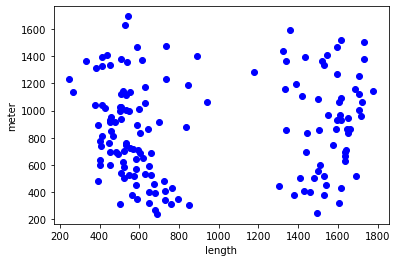

In [30]:
X=data[["x1","x2"]]
plt.scatter(X["x1"],X["x2"],c="blue")
plt.xlabel("length")
plt.ylabel("meter")
plt.show()



In [31]:
K=3
Centroids=(X.sample(n=K))
Centroids

,x1,x2
115,1496,244
79,451,918
55,553,725


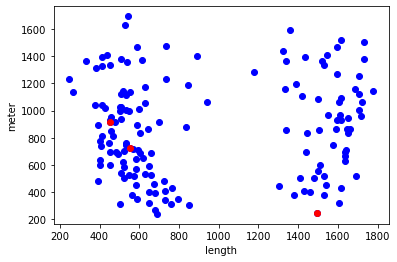

In [32]:
plt.scatter(X["x1"],X["x2"],c="blue")
plt.scatter(Centroids["x1"],Centroids["x2"],c="red")
plt.xlabel("length")
plt.ylabel("meter")
plt.show()

In [33]:
diff=1
j=0
while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["x1"]-row_d["x2"])**2
            d2=(row_c["x2"]-row_d["x2"])**2
            d=sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist=row[i+1]
                pos=i+1
        C.append(pos)
    X["Clust"]=C
    Centroids_new=X.groupby(["Clust"]).mean()[["x2","x1"]]
    if j== 0:
        diff= 1
        j=j+1
    else:
        diff=(Centroids_new['x2']-Centroids['x2']).sum()+(Centroids_new['x1']-Centroids['x1']).sum()
        print(diff.sum())
    Centroids=X.groupby(["Clust"]).mean()[["x2","x1"]]

-166.54679758369628
-587.8967948717947
69.40885780885776
-14.933772276110915
8.742775704362202
0.0


In [37]:
Centroids

,x2,x1
Clust,,
1,1323.511628,993.767442
2,510.451613,896.193548
3,922.632653,939.836735


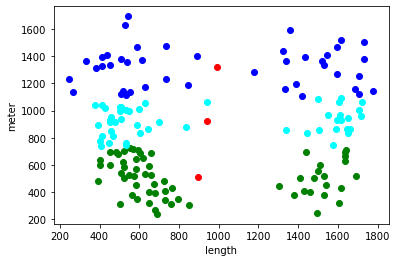

In [38]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Clust"]==k+1]
    plt.scatter(data["x1"],data["x2"],c=color[k])
plt.scatter(Centroids["x1"],Centroids["x2"],c='red')
plt.xlabel("length")
plt.ylabel("meter")
plt.show()
    